# **Exercise 03: bar charts**

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import sqlite3

import pandas as pd

Import allowed entities:

In [4]:
from pandas import DataFrame
from sqlite3 import Connection

Create a dictionary for connection to the database:

In [5]:
conn_params: dict = {"db_file": "checking_logs.sqlite", "db_file_path": "../../data/", }

Make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M):

In [6]:
conn: Connection = sqlite3.connect(conn_params["db_file_path"] + conn_params["db_file"], )

Check connection:

In [7]:
conn.cursor().execute("SELECT 123;", );

## Analyze only the users and not the admins:

Create a query:

In [8]:
sql_q: str = """
             SELECT
                 checker.timestamp AS datetime
             FROM
                 checker
             WHERE
                 checker.uid LIKE 'user_%';
             """

Run a query:

In [9]:
df: DataFrame = pd.io.sql.read_sql(
    sql_q,
    conn,
    parse_dates=["datetime", ],
)

Chech result:

In [10]:
df.head()

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


## For each hour, calculate the average number of commits on working days and on weekends use these values for your graph:

Add necessary *Pandas* dataframe columns:

In [11]:
df["hour"] = df["datetime"].dt.hour
df["date"] = df["datetime"].dt.date
df["day_type"] = df["datetime"].dt.dayofweek.apply(lambda day: "weekend" if day >= 5 else "working_day", )

Check them:

In [12]:
df.head()

,datetime,hour,date,day_type
0,2020-04-17 05:19:02.744528,5,2020-04-17,working_day
1,2020-04-17 05:22:35.249331,5,2020-04-17,working_day
2,2020-04-17 05:22:45.549397,5,2020-04-17,working_day
3,2020-04-17 05:34:14.691200,5,2020-04-17,working_day
4,2020-04-17 05:34:24.422370,5,2020-04-17,working_day


Create a list for `groupby()` method calling:

In [13]:
groupby_cols: list = [
    "date",
    "hour",
    "day_type",
]

Calculate commits count for every hours of every day:

In [14]:
df = df.groupby(by=groupby_cols, ).size().reset_index(name="commits", )

Check it:

In [15]:
df.head()

,date,hour,day_type,commits
0,2020-04-17,5,working_day,13
1,2020-04-17,11,working_day,8
2,2020-04-17,12,working_day,2
3,2020-04-18,7,weekend,1
4,2020-04-18,13,weekend,5


Calculate average commits for every hour:

In [16]:
df = df.groupby(["hour", "day_type", ], )["commits"].mean().reset_index(name="avg_commits", )

Check it:

In [17]:
df.head()

,hour,day_type,avg_commits
0,0,weekend,2.0
1,0,working_day,3.0
2,1,weekend,6.0
3,3,weekend,1.0
4,3,working_day,2.0


Create a pivot table for a plot:

In [18]:
df = df.pivot_table(
    index="hour",
    columns="day_type",
    values="avg_commits",
    fill_value=0,
).reset_index()

Check it:

In [19]:
df.head()

day_type,hour,weekend,working_day
0,0,2.0,3.0
1,1,6.0,0.0
2,3,1.0,2.0
3,5,2.0,7.5
4,6,0.0,1.5


Fill missing hours in *Pandas* dataframe:

In [20]:
df = pd.merge(
    DataFrame({"hour": range(24, ), }, ),
    df,
    on="hour",
    how="left",
)

Fill `NaN` cells by `0`:

In [21]:
df.fillna(0, inplace=True, )

Check it:

In [22]:
df.head()

,hour,weekend,working_day
0,0,2.0,3.0
1,1,6.0,0.0
2,2,0.0,0.0
3,3,1.0,2.0
4,4,0.0,0.0


## The `fontsize=` and the `figsize=` remain the same.

## Choose a palette:

In [23]:
palette: list = ["lightseagreen", "grey", ]

Draw a bar plot:

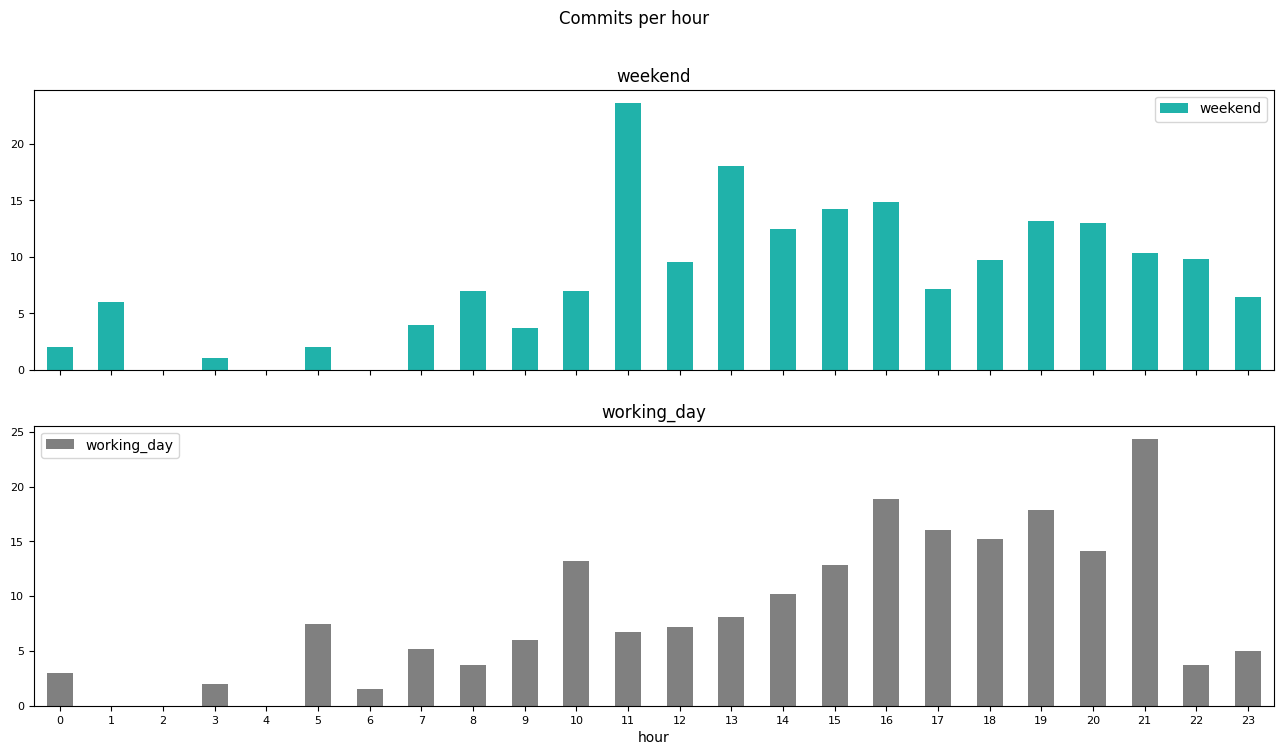

In [24]:
df.plot.bar(
    x="hour",
    y=["weekend", "working_day", ],
    rot=0,
    fontsize=8,
    color=palette,
    subplots=True,
    figsize=(16, 8, ),
    title="Commits per hour",
);

## At the end of *Jupyter Notebook*, create a markdown  cell and insert the question: `“Is the dynamic different on working days and weekends?”`

* for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend:

In [25]:
print(f"The hour when the number of commits is the largest during working days is {df.sort_values(by=["working_day", ], ).index[-1]}.", )

The hour when the number of commits is the largest during working days is 21.


In [26]:
print(f"The hour when it is the largest during the weekend is {df.sort_values(by=["weekend", ], ).index[-1]}.", )

The hour when it is the largest during the weekend is 11.


Close the connection to the database:

In [27]:
conn.close()